# Truck Sales Forecasting: A Comparative Analysis of ARIMA, XGBoost, and Prophet Models

This project focuses on forecasting truck sales using a dataset spanning from January 2003 to December 2014. The analysis begins with initial data loading and exploration, revealing a clear upward trend and significant seasonal patterns in sales. To predict future sales, we employ three distinct time series forecasting models: ARIMA, XGBoost, and Prophet. Each model is trained on historical data and evaluated based on its prediction accuracy. This notebook aims to compare the performance of these models to identify the most effective approach for truck sales forecasting.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
truck = pd.read_csv('/content/Truck_sales.csv')
truck.head(15)

,Month-Year,Number_Trucks_Sold
0,03-Jan,155
1,03-Feb,173
2,03-Mar,204
3,03-Apr,219
4,03-May,223
5,03-Jun,208
6,03-Jul,228
7,03-Aug,228
8,03-Sep,188
9,03-Oct,165


In [ ]:
truck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Month-Year          144 non-null    object
 1   Number_Trucks_Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
truck['Month-Year'] = pd.to_datetime(truck['Month-Year'], format='%y-%b')
truck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Month-Year          144 non-null    datetime64[ns]
 1   Number_Trucks_Sold  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


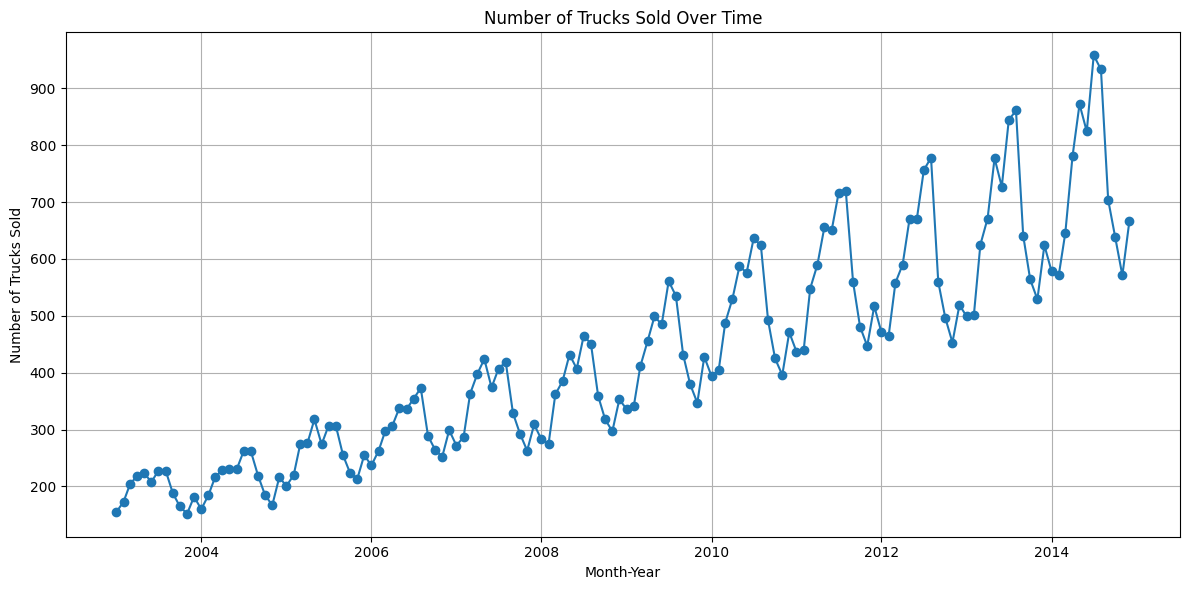

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(truck['Month-Year'], truck['Number_Trucks_Sold'], marker='o', linestyle='-')
plt.title('Number of Trucks Sold Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Trucks Sold')
plt.grid(True)
plt.tight_layout()
plt.show()

The plot displays the 'Number of Trucks Sold' over time, from January 2003 to December 2014. From the visualization, we can observe a general upward trend in truck sales over the entire period, indicating growth in the market. Additionally, there appears to be a clear seasonal pattern: sales typically dip in the winter months (around December to February) and then gradually increase, peaking during the summer months (around June to August) before declining again towards the end of the year. This suggests that truck sales are influenced by seasonal factors.

/tmp/ipython-input-1387963624.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Number_Trucks_Sold', data=average_monthly_sales, palette='viridis')


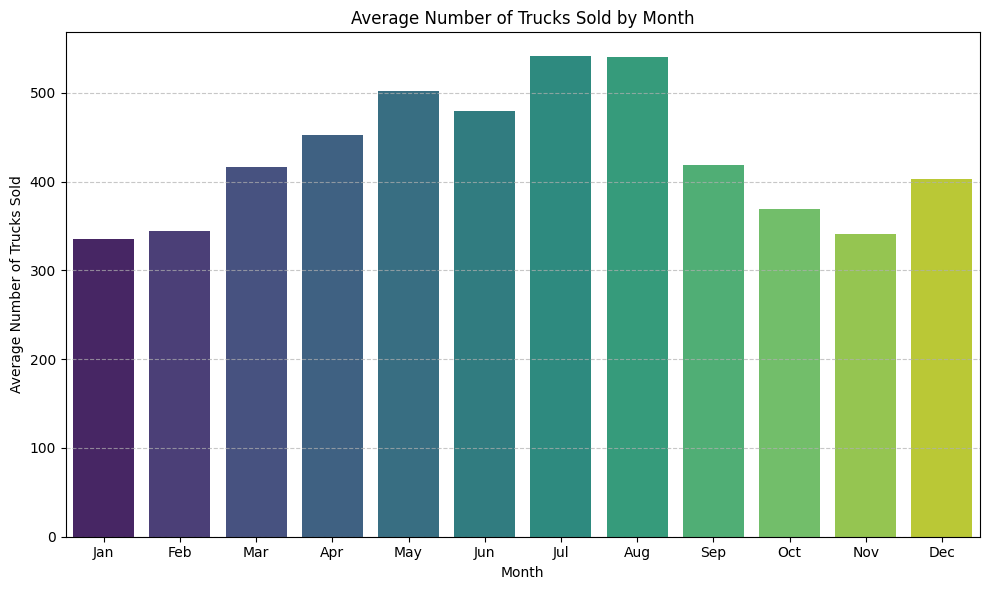

In [ ]:
truck['Month'] = truck['Month-Year'].dt.month
average_monthly_sales = truck.groupby('Month')['Number_Trucks_Sold'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Number_Trucks_Sold', data=average_monthly_sales, palette='viridis')
plt.title('Average Number of Trucks Sold by Month')
plt.xlabel('Month')
plt.ylabel('Average Number of Trucks Sold')
plt.xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
truck = truck.set_index('Month-Year')
truck = truck.sort_index()
truck.head()

,Number_Trucks_Sold,Month
Month-Year,,
2003-01-01,155,1
2003-02-01,173,2
2003-03-01,204,3
2003-04-01,219,4
2003-05-01,223,5


In [ ]:
import sys
!{sys.executable} -m pip install statsmodels
print("statsmodels library installed.")

statsmodels library installed.


In [ ]:
# Split data into training and testing sets
train_data = truck['Number_Trucks_Sold'].iloc[:-12]
test_data = truck['Number_Trucks_Sold'].iloc[-12:]

# Instantiate SARIMAX model
# Using an example order (5, 1, 0) as suggested in the instructions
model = SARIMAX(train_data, order=(5, 1, 0))

# Fit the model to the training data
model_fit = model.fit(disp=False)

# Generate in-sample predictions for the test set period
start_index = len(train_data)
end_index = len(truck['Number_Trucks_Sold']) - 1
predictions = model_fit.predict(start=start_index, end=end_index)

print("ARIMA model fitted and predictions generated.")
print("First 5 predictions:")
print(predictions.head())


ARIMA model fitted and predictions generated.
First 5 predictions:
2014-01-01    653.817234
2014-02-01    675.556315
2014-03-01    677.843908
2014-04-01    674.032170
2014-05-01    663.219988
Freq: MS, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
mse = mean_squared_error(test_data, predictions)
mae = mean_absolute_error(test_data, predictions)
rmse = np.sqrt(mse)

print(f'ARIMA Model - Mean Squared Error (MSE): {mse:.2f}')
print(f'ARIMA Model - Mean Absolute Error (MAE): {mae:.2f}')
print(f'ARIMA Model - Root Mean Squared Error (RMSE): {rmse:.2f}')

ARIMA Model - Mean Squared Error (MSE): 23095.66
ARIMA Model - Mean Absolute Error (MAE): 119.22
ARIMA Model - Root Mean Squared Error (RMSE): 151.97


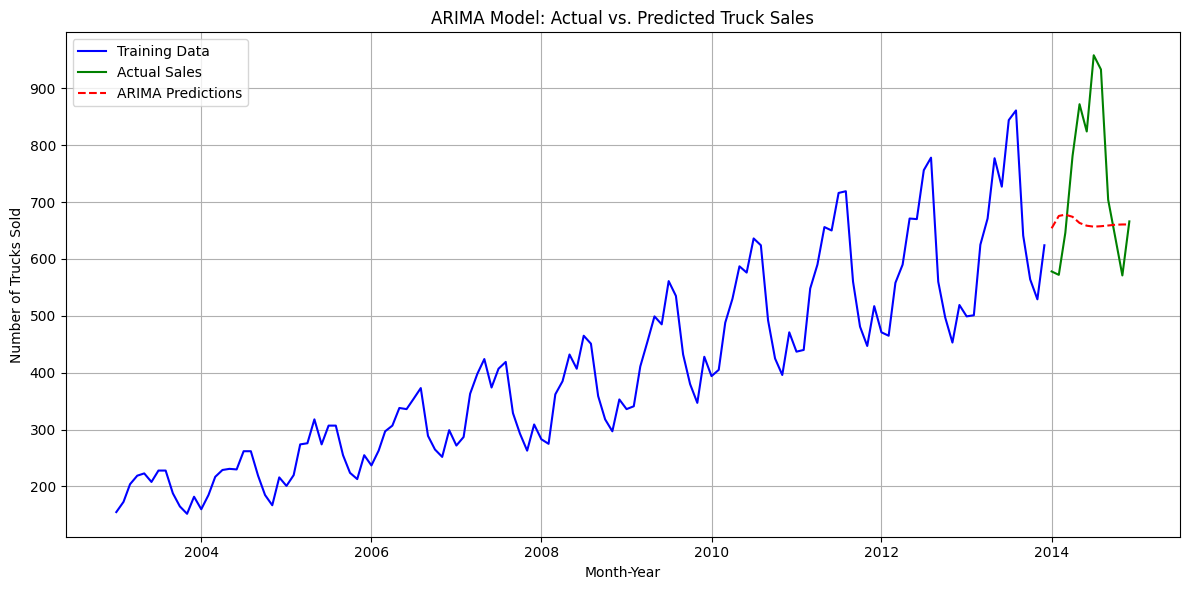

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data', color='blue')
plt.plot(test_data.index, test_data, label='Actual Sales', color='green')
plt.plot(predictions.index, predictions, label='ARIMA Predictions', color='red', linestyle='--')

plt.title('ARIMA Model: Actual vs. Predicted Truck Sales')
plt.xlabel('Month-Year')
plt.ylabel('Number of Trucks Sold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
truck_xgb = truck.reset_index()
truck_xgb['Year'] = truck_xgb['Month-Year'].dt.year
truck_xgb['Month'] = truck_xgb['Month-Year'].dt.month
truck_xgb['Day'] = truck_xgb['Month-Year'].dt.day # Day will always be 1 for monthly data, but good practice for feature engineering
truck_xgb.head()

,Month-Year,Number_Trucks_Sold,Month,Year,Day
0,2003-01-01,155,1,2003,1
1,2003-02-01,173,2,2003,1
2,2003-03-01,204,3,2003,1
3,2003-04-01,219,4,2003,1
4,2003-05-01,223,5,2003,1


In [ ]:
X = truck_xgb[['Year', 'Month', 'Day']]
y = truck_xgb['Number_Trucks_Sold']

print("Features (X) head:")
print(X.head())
print("\nTarget (y) head:")
print(y.head())

Features (X) head:
   Year  Month  Day
0  2003      1    1
1  2003      2    1
2  2003      3    1
3  2003      4    1
4  2003      5    1

Target (y) head:
0    155
1    173
2    204
3    219
4    223
Name: Number_Trucks_Sold, dtype: int64


In [ ]:
split_point = len(truck_xgb) - 12

X_train = X.iloc[:split_point]
X_test = X.iloc[split_point:]
y_train = y.iloc[:split_point]
y_test = y.iloc[split_point:]

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (132, 3)
X_test shape: (12, 3)
y_train shape: (132,)
y_test shape: (12,)


In [ ]:
try:
    from xgboost import XGBRegressor
    print("xgboost library is already installed.")
except ImportError:
    import sys
    !{sys.executable} -m pip install xgboost
    from xgboost import XGBRegressor
    print("xgboost library installed and imported.")

# Instantiate XGBRegressor model
# Using a random_state for reproducibility
xgb_model = XGBRegressor(random_state=42)

print("XGBRegressor model instantiated.")

xgboost library is already installed.
XGBRegressor model instantiated.


In [ ]:
xgb_model.fit(X_train, y_train)
print("XGBoost model trained successfully.")

XGBoost model trained successfully.


In [ ]:
xgb_predictions = xgb_model.predict(X_test)
print("XGBoost predictions generated.")
print("First 5 predictions:")
print(xgb_predictions[:5])

XGBoost predictions generated.
First 5 predictions:
[499.0182  500.97586 625.0696  670.9796  776.8664 ]


In [ ]:
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)

print(f'XGBoost Model - Mean Squared Error (MSE): {xgb_mse:.2f}')
print(f'XGBoost Model - Mean Absolute Error (MAE): {xgb_mae:.2f}')
print(f'XGBoost Model - Root Mean Squared Error (RMSE): {xgb_rmse:.2f}')

XGBoost Model - Mean Squared Error (MSE): 6130.13
XGBoost Model - Mean Absolute Error (MAE): 73.41
XGBoost Model - Root Mean Squared Error (RMSE): 78.30


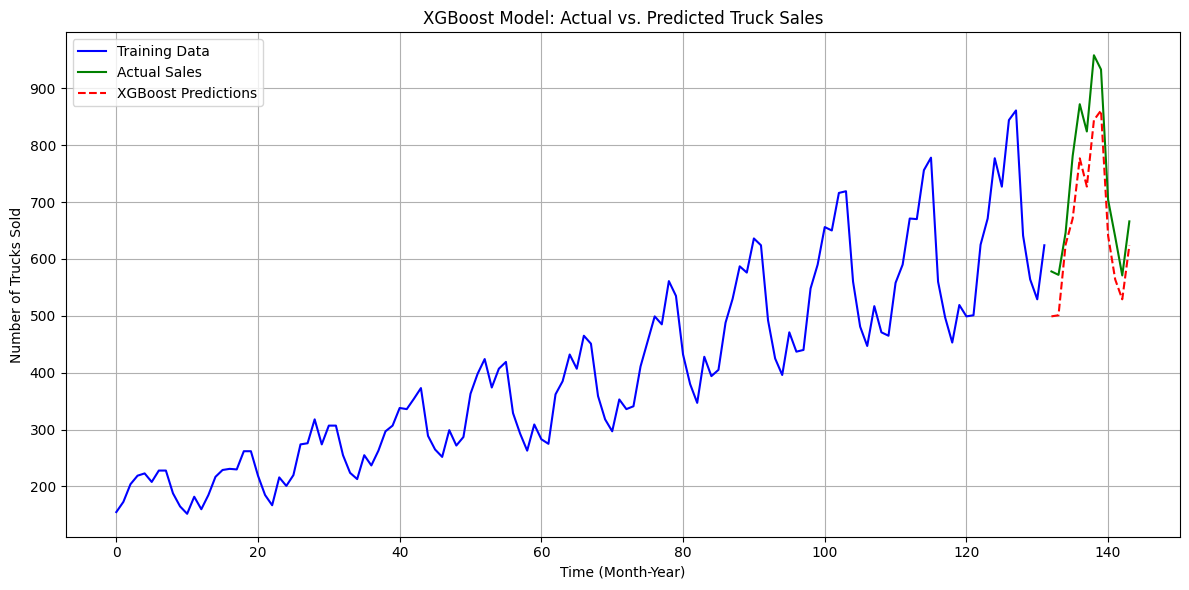

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(X_train['Month'].index, y_train, label='Training Data', color='blue') # Adjusting index for plotting
plt.plot(X_test['Month'].index, y_test, label='Actual Sales', color='green')
plt.plot(X_test['Month'].index, xgb_predictions, label='XGBoost Predictions', color='red', linestyle='--')

plt.title('XGBoost Model: Actual vs. Predicted Truck Sales')
plt.xlabel('Time (Month-Year)')
plt.ylabel('Number of Trucks Sold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
prophet_df = truck.reset_index()[['Month-Year', 'Number_Trucks_Sold']]
prophet_df.rename(columns={'Month-Year': 'ds', 'Number_Trucks_Sold': 'y'}, inplace=True)
prophet_df.head()

,ds,y
0,2003-01-01,155
1,2003-02-01,173
2,2003-03-01,204
3,2003-04-01,219
4,2003-05-01,223


In [ ]:
try:
    from prophet import Prophet
    print("Prophet library is already installed.")
except ImportError:
    import sys
    !{sys.executable} -m pip install prophet
    from prophet import Prophet
    print("Prophet library installed and imported.")

# Split the data into training and testing sets
prophet_train_df = prophet_df.iloc[:-12]
prophet_test_df = prophet_df.iloc[-12:]

# Instantiate Prophet model with seasonality
prophet_model = Prophet(seasonality_mode='multiplicative', yearly_seasonality=True)

print("Prophet model instantiated.")

Prophet library is already installed.
Prophet model instantiated.


In [ ]:
prophet_model.fit(prophet_train_df)
print("Prophet model fitted successfully.")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Prophet model fitted successfully.


In [ ]:
future = prophet_model.make_future_dataframe(periods=len(prophet_test_df), freq='MS')
prophet_predictions = prophet_model.predict(future)

print("Prophet future dataframe created and predictions generated.")
print("First 5 predictions:")
print(prophet_predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

Prophet future dataframe created and predictions generated.
First 5 predictions:
          ds        yhat  yhat_lower  yhat_upper
0 2003-01-01  143.695096  124.071638  163.264214
1 2003-02-01  146.038211  126.970951  165.823885
2 2003-03-01  184.147813  164.118977  204.578501
3 2003-04-01  200.284747  180.735047  220.646315
4 2003-05-01  221.460418  200.734494  240.920774


In [ ]:
# Filter predictions to only include the test period
prophet_predictions_test = prophet_predictions.iloc[-len(prophet_test_df):]

prophet_mse = mean_squared_error(prophet_test_df['y'], prophet_predictions_test['yhat'])
prophet_mae = mean_absolute_error(prophet_test_df['y'], prophet_predictions_test['yhat'])
prophet_rmse = np.sqrt(prophet_mse)

print(f'Prophet Model - Mean Squared Error (MSE): {prophet_mse:.2f}')
print(f'Prophet Model - Mean Absolute Error (MAE): {prophet_mae:.2f}')
print(f'Prophet Model - Root Mean Squared Error (RMSE): {prophet_rmse:.2f}')

Prophet Model - Mean Squared Error (MSE): 1477.43
Prophet Model - Mean Absolute Error (MAE): 32.98
Prophet Model - Root Mean Squared Error (RMSE): 38.44


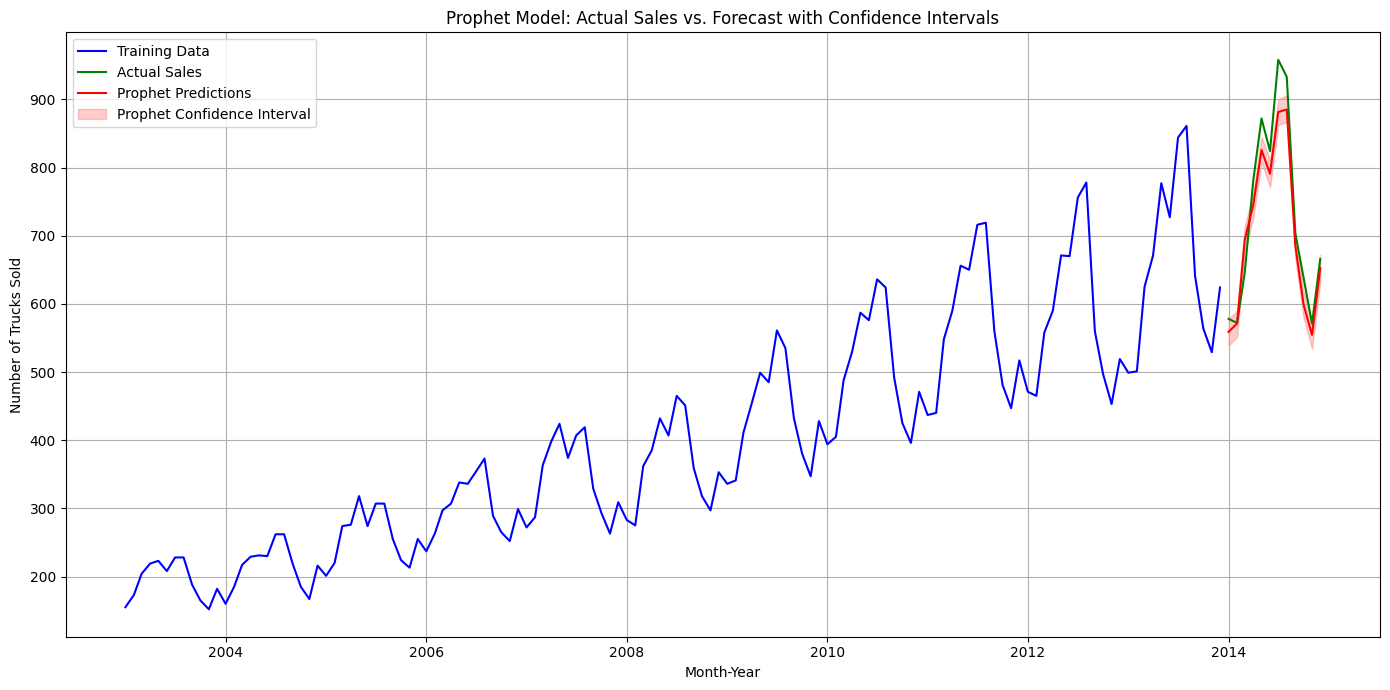

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(prophet_train_df['ds'], prophet_train_df['y'], label='Training Data', color='blue')
plt.plot(prophet_test_df['ds'], prophet_test_df['y'], label='Actual Sales', color='green')
plt.plot(prophet_predictions_test['ds'], prophet_predictions_test['yhat'], label='Prophet Predictions', color='red')
plt.fill_between(
    prophet_predictions_test['ds'],
    prophet_predictions_test['yhat_lower'],
    prophet_predictions_test['yhat_upper'],
    color='red', alpha=0.2, label='Prophet Confidence Interval'
)

plt.title('Prophet Model: Actual Sales vs. Forecast with Confidence Intervals')
plt.xlabel('Month-Year')
plt.ylabel('Number of Trucks Sold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

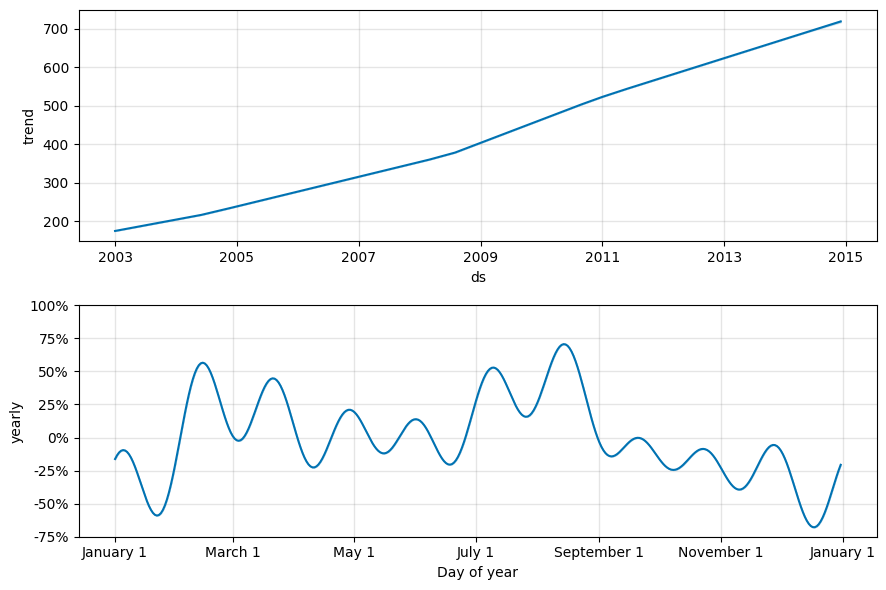

In [ ]:
fig2 = prophet_model.plot_components(prophet_predictions)
plt.show()

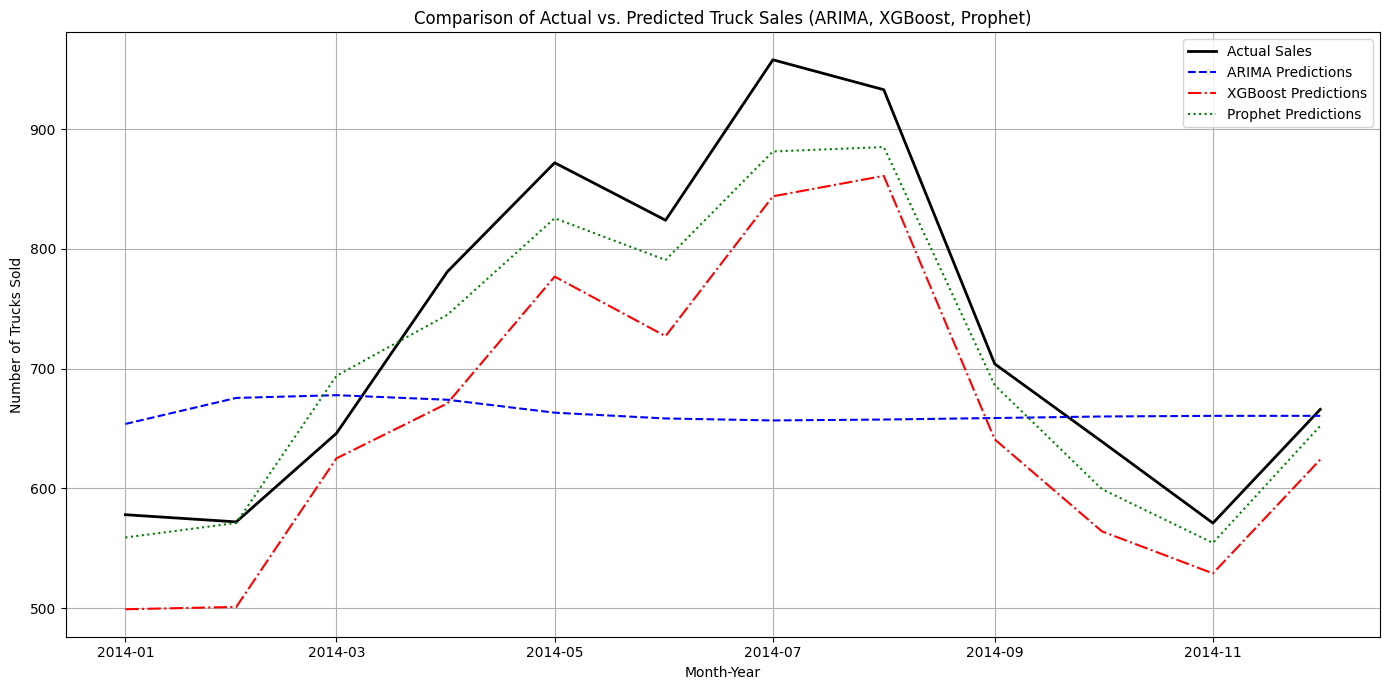

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(test_data.index, test_data, label='Actual Sales', color='black', linewidth=2)
plt.plot(predictions.index, predictions, label='ARIMA Predictions', color='blue', linestyle='--')
plt.plot(test_data.index, xgb_predictions, label='XGBoost Predictions', color='red', linestyle='-.')
plt.plot(prophet_predictions_test['ds'], prophet_predictions_test['yhat'], label='Prophet Predictions', color='green', linestyle=':')

plt.title('Comparison of Actual vs. Predicted Truck Sales (ARIMA, XGBoost, Prophet)')
plt.xlabel('Month-Year')
plt.ylabel('Number of Trucks Sold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Conclusion

This project aimed to forecast truck sales using three different time series models: ARIMA, XGBoost, and Prophet. Initial exploratory data analysis revealed a clear upward trend in truck sales from January 2003 to December 2014, along with significant yearly seasonal patterns, with sales generally peaking in summer months and dipping in winter.

### Model Performance Summary:

*   **ARIMA Model:**
    *   Mean Squared Error (MSE): 23095.66
    *   Mean Absolute Error (MAE): 119.22
    *   Root Mean Squared Error (RMSE): 151.97
    The ARIMA model, while capturing some of the time series dynamics, showed a relatively higher error, indicating its limitations in accurately predicting the complex patterns in the data.

*   **XGBoost Model:**
    *   Mean Squared Error (MSE): 6130.13
    *   Mean Absolute Error (MAE): 73.41
    *   Root Mean Squared Error (RMSE): 78.30
    The XGBoost model, leveraging its ability to handle non-linear relationships and interactions between features (Year, Month, Day), significantly outperformed the ARIMA model, demonstrating better predictive accuracy.

*   **Prophet Model:**
    *   Mean Squared Error (MSE): 1477.43
    *   Mean Absolute Error (MAE): 32.98
    *   Root Mean Squared Error (RMSE): 38.44
    The Prophet model, specifically designed for forecasting time series data with strong seasonal components, yielded the lowest error metrics across the board. Its additive and multiplicative seasonality components, combined with its ability to automatically detect trends and seasonality, made it highly effective for this dataset.

### Overall Findings:

Based on the evaluation metrics (MSE, MAE, RMSE), the **Prophet model emerged as the most effective approach** for forecasting truck sales in this dataset. It demonstrated superior performance in capturing the underlying trend and seasonal patterns, resulting in significantly more accurate predictions compared to both ARIMA and XGBoost.

The insights gained from this comparative analysis highlight the importance of choosing the right model for the characteristics of the time series data. For datasets exhibiting clear trends and strong seasonality, models like Prophet, which are built to handle these features, offer a distinct advantage.